In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib
%matplotlib inline

### Extract CSVs into DataFrames

In [2]:
athlete_csv_file = "Resources/athlete_events.csv"
df_athlete_data = pd.read_csv(athlete_csv_file)
df_athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Year vs Female Number

In [3]:
df_female = df_athlete_data[df_athlete_data.Sex == 'F']
df_female.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# df_female['Name'].value_counts()

In [5]:
df_female_unique = df_female.drop_duplicates('Name')
df_female_unique.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
34,14,Pirjo Hannele Aalto (Mattila-),F,32.0,171.0,65.0,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Women's 7.5 kilometres Sprint,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


In [6]:
# df_female_unique['Name'].value_counts()
len(df_athlete_data), len(df_female), len(df_female_unique)

(271116, 74522, 33808)

# Group by year, and count how many female participate

In [7]:

df_year_female = df_female_unique.groupby('Year').count()['Name'].to_frame()
df_year_female.head()

,Name
Year,
1900,23
1904,6
1906,6
1908,44
1912,53


In [8]:
df_year_female.head()

,Name
Year,
1900,23
1904,6
1906,6
1908,44
1912,53


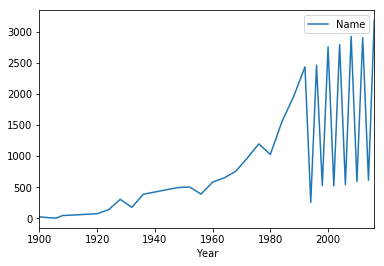

In [9]:
df_year_female.plot.line()

In [11]:
select_col = ['Sex', 'Age', 'Team', 'Sport', 'Year', 'Season']
df_athlete_data = df_athlete_data[select_col]
df_athlete_data.head()

,Sex,Age,Team,Sport,Year,Season
0,M,24.0,China,Basketball,1992,Summer
1,M,23.0,China,Judo,2012,Summer
2,M,24.0,Denmark,Football,1920,Summer
3,M,34.0,Denmark/Sweden,Tug-Of-War,1900,Summer
4,F,21.0,Netherlands,Speed Skating,1988,Winter


In [12]:
df_athlete_data.to_csv("./athlete_events_select.csv", index=False, header=True)

In [13]:
region_csv_file = "Resources/noc_regions.csv"
region_data_df = pd.read_csv(region_csv_file)
region_data_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Create database connection

In [ ]:
conn =
engine = create_engine()

### Load DataFrames into database